In [5]:
from itertools import count

import pandas as pd
import csv
import yfinance as yf

import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import statsmodels.api as sm
import fredapi
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
#read Houseprices data
adv = pd.read_csv(r"C:\Users\chase\Dropbox (Old)\My PC (LAPTOP-P3ARPLF9)\Downloads\HousePrices.csv")


#view first 5 rows of the data
adv[:5]

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [7]:
# Shows the first five rows of the data
adv.head()


,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [8]:
#Checking the number of rows and columns
adv.shape

(546, 12)

In [9]:
#To see the statistical details of the dataset, we can use describe():
adv.describe()

,price,lotsize,bedrooms,bathrooms,stories,garage
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
#Part 1 - ii
#page 126 of textbook

i.	Construct a summary stat for all the variables in the HousePrices data. (provide Mean, Median, Max, Min, and Std Dev of the data for all variables) (4 points)

In [11]:
adv.describe()

,price,lotsize,bedrooms,bathrooms,stories,garage
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


ii.	What is the percentage of houses in the data with Driveway, Gas-Heat and Air-conditioning present?  (Hint: find the mean after creating dummy variables with driveway, gasheat, and aircon variables respectively).

In [12]:
adv['driveway_dummy'] = adv['driveway'].map({'yes': 1, 'no': 0})
adv['gasheat_dummy'] = adv['gasheat'].map({'yes': 1, 'no': 0})
adv['aircon_dummy'] = adv['aircon'].map({'yes': 1, 'no': 0})
driveway_pct = adv['driveway_dummy'].mean() * 100
gasheat_pct = adv['gasheat_dummy'].mean() * 100
aircon_pct = adv['aircon_dummy'].mean() * 100
print("driveway_pct:", driveway_pct)
print("gasheat_pct:", gasheat_pct)
print("aircon_pct:", aircon_pct)

driveway_pct: 85.8974358974359
gasheat_pct: 4.5787545787545785
aircon_pct: 31.684981684981683


iii.	Construct a linear regression model to test whether number of bedrooms influence house prices.  Provide a summary of the linear regression model using summary() function.  			(5 points)

In [13]:
X = sm.add_constant(adv['bedrooms']) 
model = sm.OLS(adv['price'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     84.38
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           8.53e-19
Time:                        14:41:54   Log-Likelihood:                -6300.0
No. Observations:                 546   AIC:                         1.260e+04
Df Residuals:                     544   BIC:                         1.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.877e+04   4413.753      6.519      0.0

iv.	Construct a multiple linear regression model by including all variables as predictors of house prices (response variable) and observe the effect on the house prices. Provide a summary of the regression model using summary() function.  (5 points)

In [14]:
def map_function(x):
    return 1 if x else 0

columns_to_convert = ['driveway', 'recreation', 'fullbase', 'gasheat', 'aircon', 'prefer']
adv2 = adv
adv2[columns_to_convert] = adv2[columns_to_convert].map(map_function)

X = sm.add_constant(adv[['lotsize', 'bedrooms', 'bathrooms', 'stories', 'driveway', 'recreation', 'fullbase', 'gasheat', 'aircon', 'garage', 'prefer']])
model = sm.OLS(adv['price'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     138.2
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           3.38e-94
Time:                        14:41:54   Log-Likelihood:                -6114.4
No. Observations:                 546   AIC:                         1.224e+04
Df Residuals:                     540   BIC:                         1.227e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lotsize        4.7334      0.380     12.462      0.0

Part 2: 		(20 points)
Use the Credit data to perform the following tests using Linear Regression settings:
A.	Perform the following steps: 	(5 points) 
i.	Observe the dimension of the Credit data.	(1 points)	
ii.	Provide a summary stat for the variables in Credit data.		(1 points)
iii.	What is the percentage of Student in the Credit data? What is the percentage of Female in the Credit data? What is the percentage of Student who are Female in the Credit data?	(3 points)


In [27]:
df = pd.read_csv(r"Credit.csv")
print(df.shape)
print(df.describe())
studentpct = (df['Student'] == 'Yes').sum()/400
print("the percentage of students is:",studentpct)
femalepct = (df['Gender'] == 'Female').sum()/400
print ("The percent of users identifying as female is:", femalepct)
femalestudents = df[(df['Student'] == 'Yes') & (df['Gender'] == 'Female')]
femalestudentpct = (len(femalestudents) / len(df))
print ("The percent of female students is:", femalestudentpct)

(400, 12)
       Unnamed: 0      Income         Limit      Rating       Cards  \
count  400.000000  400.000000    400.000000  400.000000  400.000000   
mean   200.500000   45.218885   4735.600000  354.940000    2.957500   
std    115.614301   35.244273   2308.198848  154.724143    1.371275   
min      1.000000   10.354000    855.000000   93.000000    1.000000   
25%    100.750000   21.007250   3088.000000  247.250000    2.000000   
50%    200.500000   33.115500   4622.500000  344.000000    3.000000   
75%    300.250000   57.470750   5872.750000  437.250000    4.000000   
max    400.000000  186.634000  13913.000000  982.000000    9.000000   

              Age   Education      Balance  
count  400.000000  400.000000   400.000000  
mean    55.667500   13.450000   520.015000  
std     17.249807    3.125207   459.758877  
min     23.000000    5.000000     0.000000  
25%     41.750000   11.000000    68.750000  
50%     56.000000   14.000000   459.500000  
75%     70.000000   16.000000   863

B.	Construct a linear regression model to test the following: 	(15 points)

Test how Credit Rating and Student effect Credit Card Balance. In the same model, also test whether the effect of Credit Rating on Credit Card Balance is different for students vs. non-students.

Provide a summary of the model. 


C:\Users\chase\AppData\Local\Temp\ipykernel_43116\2523265140.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Student'] = df['Student'].replace({'Yes': 1, 'No': 0}).astype(int)


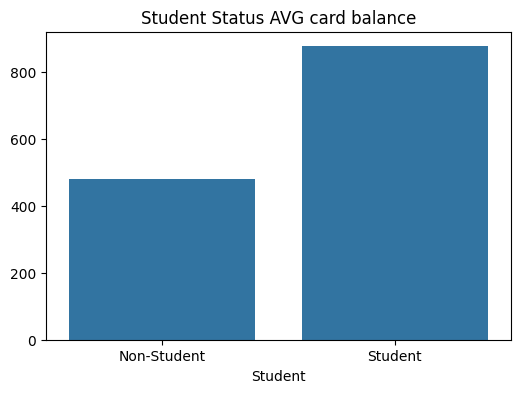

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     579.3
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          2.13e-144
Time:                        15:07:33   Log-Likelihood:                -2682.5
No. Observations:                 400   AIC:                             5373.
Df Residuals:                     396   BIC:                             5389.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -423.3712     26.146    -16.

In [39]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

file_path = "Credit.csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

df = df.dropna(subset=['Balance', 'Rating', 'Student'])

df['Student'] = df['Student'].replace({'Yes': 1, 'No': 0}).astype(int)

df['Balance'] = pd.to_numeric(df['Balance'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

student_comparison = df.groupby('Student')['Balance'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=student_comparison.index, y=student_comparison.values)
plt.xticks(ticks=[0, 1], labels=["Non-Student", "Student"])
plt.title("Student Status AVG card balance")
plt.show()

model = smf.ols("Balance ~ Rating + Student + Rating:Student", data=df).fit()
print(model.summary())

student_balance = df[df['Student'] == 1]['Balance']
non_student_balance = df[df['Student'] == 0]['Balance']

t_stat, p_value = stats.ttest_ind(student_balance, non_student_balance, equal_var=False)
print()
print()
print()
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.6f}")

Part 3: 		(20 points)
Use the Credit data to perform the following tests using Linear Regression settings: Online quiz will be based on the results of the regressions performed below.


i.	Test whether Age influence Credit Card Balance on the basis of simple linear regression.
(Provide a summary of the model).  (2 points)


In [46]:
X = df['Age']  
y = df['Balance']  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.001340
Date:                Thu, 20 Feb 2025   Prob (F-statistic):              0.971
Time:                        15:21:36   Log-Likelihood:                -3019.4
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.2922     77.852      6.645      0.000     364.241     670.344
Age            0.0489      1.336      0.037      0.971      -2.578       2.675
==============================================================================
Omnibus:                       28.715   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.393
Skew:                           0.582   Prob(JB):                     1.13e-06
Kurtosis:                       2.463   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ii.	Use Age and Credit Rating as predictors of Credit Card Balance (response variable) in a multiple linear regression setting. (Provide a summary of the model). (2 points)  



In [ ]:
import statsmodels.api as sm


X = df[['Age', 'Rating']]  
y = df['Balance']  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     606.9
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          1.82e-121
Time:                        15:10:03   Log-Likelihood:                -2739.2
No. Observations:                 400   AIC:                             5484.
Df Residuals:                     397   BIC:                             5496.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -269.5811     44.806     -6.017      0.000    -357.668    -181.494
Age           -2.3508      0.668     -3.521      0.000      -3.663      -1.038
Rating         2.5933      0.074     34.840      0.000       2.447       2.740
==============================================================================
Omnibus:                       20.938   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.510
Skew:                           0.358   Prob(JB):                     3.21e-08
Kurtosis:                       4.249   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

iii.	Compare effect of Age from part (i) and (ii): Write the explanation for part (iii) in Python code. (10 points)



In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.001340
Date:                Thu, 20 Feb 2025   Prob (F-statistic):              0.971
Time:                        15:21:12   Log-Likelihood:                -3019.4
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.2922     77.852      6.645      0.000     364.241     670.344
Age            0.0489      1.336      0.037      0.971      -2.578       2.675
==============================================================================
Omnibus:                       28.715   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.393
Skew:                           0.582   Prob(JB):                     1.13e-06
Kurtosis:                       2.463   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The First Model using Age alone has an R^2 value of 0.0000 and a F-Statistic of .001340. This model does NOT explain the effect on Credit card balance. The second model that contains Age and Credit Rating has an R^2 of .754 and an F-Statistic of 606.9, this model does a MUCH better job of explaining the variables effect on Balance.

iv.	Observe the distribution of Age. Construct 3 dummy variables based on Age distribution: (6 points)
1. Age 40 and below (Age=<40)
2. Age Between 41 to 56 (41=<Age<=56)
3. Age group over 56 (Age>56)

Construct model to observe whether credit card balance is significantly different for different age group. Consider the age group over 56 as the baseline. 


In [48]:

df['Agebelow_40'] = (df['Age'] <= 40).astype(int)
df['Age41_56'] = ((df['Age'] > 40) & (df['Age'] <= 56)).astype(int)
df['Age56_andup'] = (df['Age'] > 56).astype(int)


X_dummy = df[['Agebelow_40', 'Age41_56','Age56_andup']]
y = df['Balance']

X_dummy = sm.add_constant(X_dummy)

model_dummy = sm.OLS(y, X_dummy).fit()

model_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.557
Date:                Thu, 20 Feb 2025   Prob (F-statistic):             0.0294
Time:                        15:26:19   Log-Likelihood:                -3015.8
No. Observations:                 400   AIC:                             6038.
Df Residuals:                     397   BIC:                             6050.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         394.1419     18.000     21.897      0.000     358.755     429.529
Agebelow_40    83.4735     38.350      2.177      0.030       8.079     158.868
Age41_56      221.7277     35.091      6.319      0.000     152.740     290.716
Age56_andup    88.9406     29.358      3.030      0.003      31.224     146.657
==============================================================================
Omnibus:                       29.076   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.474
Skew:                           0.562   Prob(JB):                     1.78e-06
Kurtosis:                       2.431   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.18e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Part 4: 		(40 points)
i.	Download monthly price data of S&P500 and a stock of your choice for the period 01/01/2005 to 12/31/2019 (or any fifteen year period)   					(2 points)


In [17]:
sp500_df = yf.download(tickers='^GSPC', start="2005-01-01", end="2019-12-31", interval="1mo")
apple_df = yf.download(tickers='AAPL', start="2005-01-01", end="2019-12-31", interval="1mo")

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^GSPC']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


ii.	Compute the monthly returns for the S&P 500 and the stock. Construct one data frame to store the return series. (2 points)

In [18]:
sp500_df = sp500_df['Close'].pct_change()
apple_df = apple_df['Close'].pct_change()

df = pd.concat([sp500_df, apple_df], axis=1)
print(df)


Empty DataFrame
Columns: [^GSPC, AAPL]
Index: []


iii.	Construct summary statistics, histogram, correlation matrix of the return series. 

Ticker  ^GSPC  AAPL
count     0.0   0.0
mean      NaN   NaN
std       NaN   NaN
min       NaN   NaN
25%       NaN   NaN
50%       NaN   NaN
75%       NaN   NaN
max       NaN   NaN


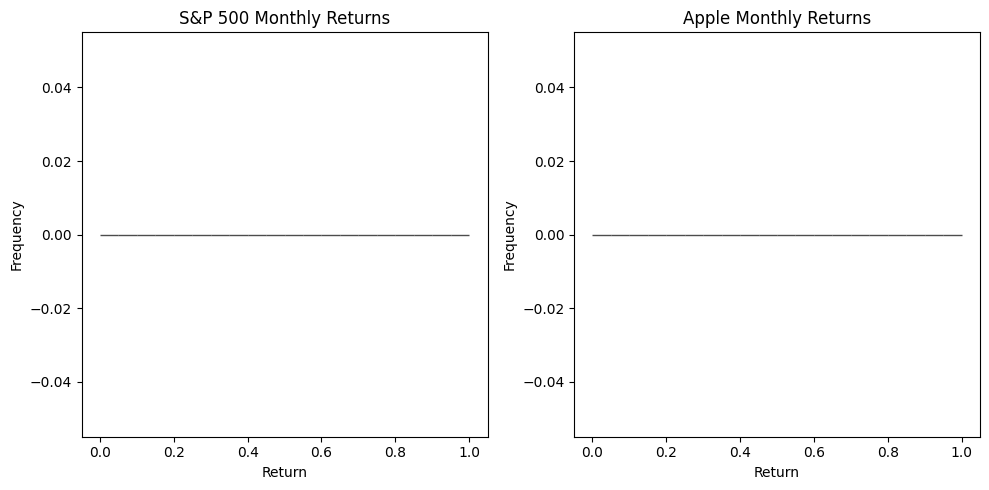

Correlation Matrix:
Ticker  ^GSPC  AAPL
Ticker             
^GSPC     NaN   NaN
AAPL      NaN   NaN


c:\Users\chase\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\chase\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


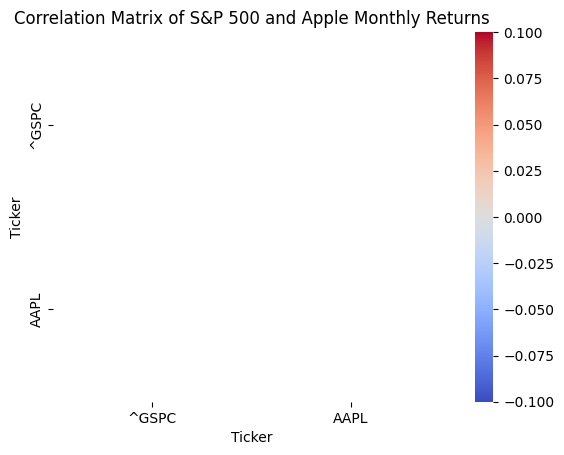

In [19]:
summary_stats = df.describe()
print(summary_stats)

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['^GSPC'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('S&P 500 Monthly Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['AAPL'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Apple Monthly Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of S&P 500 and Apple Monthly Returns')
plt.show()

iv.	Download 3 month TBill rate from Fred. Consider the TBill data  for the same sample period 01/01/2005 to 12/31/2019 (or any fifteen year period that you have chosen) . (7 points)

In [20]:
fred_api_key = '91f5a783ac7a912b0ccb8839abe17117'
fred = fredapi.Fred(fred_api_key)

t_bill = fred.get_series(series_id='TB3MS', observation_start='2005-01-01', observation_end='2019-12-31', interval='1mo')
tbill_df = pd.DataFrame(t_bill, columns=['TBill Rate'])
tbill_df['TBill Rate'] = tbill_df['TBill Rate'] / 100
tbill_df['Monthly Rate'] = tbill_df['TBill Rate'] / 12
print(tbill_df.head())

            TBill Rate  Monthly Rate
2005-01-01      0.0233      0.001942
2005-02-01      0.0254      0.002117
2005-03-01      0.0274      0.002283
2005-04-01      0.0278      0.002317
2005-05-01      0.0284      0.002367


v.	Construct a matrix of return series combining Stock, S&P500, and TBill for the sample period. Construct return series with columns of excess returns of the stock (Stock return – TBill) and S&P500 (S&P500 return – Tbill)

In [21]:
print(tbill_df.head())
print('*****************')
print(t_bill.head())

            TBill Rate  Monthly Rate
2005-01-01      0.0233      0.001942
2005-02-01      0.0254      0.002117
2005-03-01      0.0274      0.002283
2005-04-01      0.0278      0.002317
2005-05-01      0.0284      0.002367
*****************
2005-01-01    2.33
2005-02-01    2.54
2005-03-01    2.74
2005-04-01    2.78
2005-05-01    2.84
dtype: float64


In [22]:
t_bill = pd.DataFrame(t_bill, columns=['TBill Rate'])
t_bill['Monthly Rate'] = t_bill['TBill Rate'] / 12
df.to_csv("aaa.csv")
t_bill.to_csv("bbb.csv")

Ticker      ^GSPC  AAPL  T-Bill Rate  Monthly Rate
Date                                              
2005-01-01    NaN   NaN       0.0233      0.001942
2005-02-01    NaN   NaN       0.0254      0.002117
2005-03-01    NaN   NaN       0.0274      0.002283
2005-04-01    NaN   NaN       0.0278      0.002317
2005-05-01    NaN   NaN       0.0284      0.002367
...           ...   ...          ...           ...
2019-08-01    NaN   NaN       0.0195      0.001625
2019-09-01    NaN   NaN       0.0189      0.001575
2019-10-01    NaN   NaN       0.0165      0.001375
2019-11-01    NaN   NaN       0.0154      0.001283
2019-12-01    NaN   NaN       0.0154      0.001283

[180 rows x 4 columns]
Matrix of Return Series with Excess Returns:
Ticker      ^GSPC  AAPL  T-Bill Rate  Monthly Rate  Excess Return AAPL  \
Date                                                                     
2005-01-01    NaN   NaN       0.0233      0.001942                 NaN   
2005-02-01    NaN   NaN       0.0254      0.00

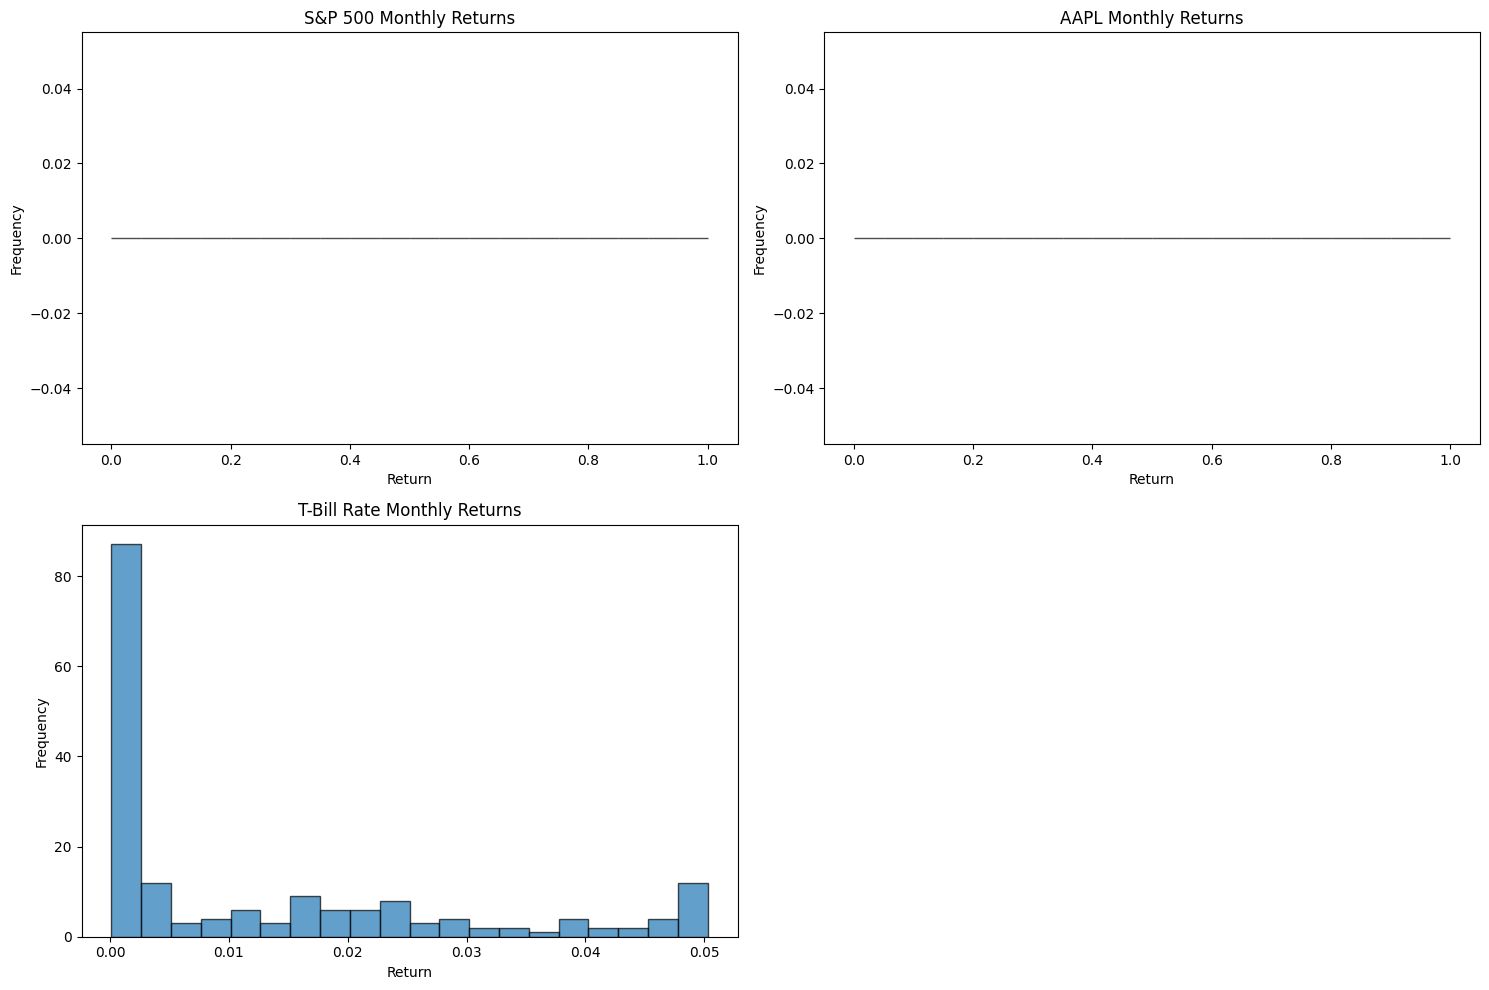

Correlation Matrix:
Ticker                 ^GSPC  AAPL  T-Bill Rate  Monthly Rate  \
Ticker                                                          
^GSPC                    NaN   NaN          NaN           NaN   
AAPL                     NaN   NaN          NaN           NaN   
T-Bill Rate              NaN   NaN          1.0           1.0   
Monthly Rate             NaN   NaN          1.0           1.0   
Excess Return AAPL       NaN   NaN          NaN           NaN   
Excess Return S&P 500    NaN   NaN          NaN           NaN   

Ticker                 Excess Return AAPL  Excess Return S&P 500  
Ticker                                                            
^GSPC                                 NaN                    NaN  
AAPL                                  NaN                    NaN  
T-Bill Rate                           NaN                    NaN  
Monthly Rate                          NaN                    NaN  
Excess Return AAPL                    NaN                

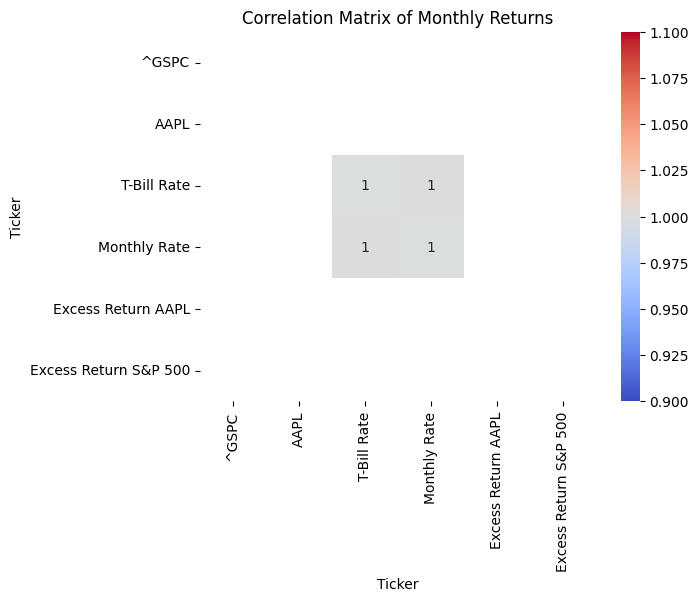

In [23]:
#df.rename(columns={'AAPL': 'Apple', '^GSPC': 'S&P 500'}, inplace=True)
#tbill = t_bill.resample('ME').mean() / 100
#df = df.resample('ME').mean()
#df['T-Bill'] = tbill
df['T-Bill Rate'] = tbill_df['TBill Rate'] 
df['Monthly Rate'] = tbill_df['Monthly Rate']
print(df)

df['Excess Return AAPL'] = df['AAPL'] - df['T-Bill Rate']
df['Excess Return S&P 500'] = df['^GSPC'] - df['T-Bill Rate']

print("Matrix of Return Series with Excess Returns:")
print(df)

# Summary statistics
summary_statistics = df.describe()
print("Summary Statistics:")
print(summary_statistics)

# Plot histograms
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[:3]):
    plt.subplot(2, 2, i + 1)
    plt.hist(df[column].dropna(), bins=20, edgecolor='k', alpha=0.7)
    if column == '^GSPC':
        column = 'S&P 500'
    plt.title(f'{column} Monthly Returns')
    plt.xlabel('Return')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Monthly Returns')
plt.show()

vi.	Construct a linear regression model with the excess returns : stock excess return being the response variable and S&P500 excess return the predictor. (2 points)

In [24]:
df = df.dropna()
X = df['Excess Return S&P 500']
y = df['Excess Return AAPL']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

ValueError: zero-size array to reduction operation maximum which has no identity

vii.	Find Beta for the stock based on the model constructed. Test the null hypothesis:                   ; what do you conclude? Draw your conclusion based on p-value.  									(4 points)

In [ ]:
beta = model.params['Excess Return S&P 500']
p_value = model.pvalues['Excess Return S&P 500']

print(f"Beta (Excess Return S&P 500): {round(beta, 4)}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    conclusion = "Reject the null hypothesis. The Beta is statistically significant."
else:
    conclusion = "Fail to reject the null hypothesis. The Beta is not statistically significant."

print(f"Conclusion: {conclusion}")

Beta (Excess Return S&P 500): 1.1466
P-Value: 3.3415652755284122e-15
Conclusion: Reject the null hypothesis. The Beta is statistically significant.


viii.	Obtain beta of the stock from available stock report (refer the financial website that you choose).  Discuss why these two measures are same or different.					(2 points)  

Reponse: 
https://finance.yahoo.com/quote/AAPL/key-statistics/?form=MG0AV3#:~:text=Stock%20Price%20History-,Beta%20(5Y%20Monthly),-1.20 

Referencing the above URL, the most logical reason would be:
1. Yahoo Finance is using a 5-year range compared to the 15-year range we are using. As a result we have more data points to work with to make a more logical decision on the volatility of Apple's stock compared to the overall market. 

Reponse: 
https://finance.yahoo.com/quote/AAPL/key-statistics/?form=MG0AV3#:~:text=Stock%20Price%20History-,Beta%20(5Y%20Monthly),-1.20 

Referencing the above URL, the most logical reason would be:
1. Yahoo Finance is using a 5-year range compared to the 15-year range we are using. As a result we have more data points to work with to make a more logical decision on the volatility of Apple's stock compared to the overall market. 

In [ ]:
ix.	Comment on model accuracy: standard error and R-square

An r-sqared value of .296 means that the S&P 500 excess return has a weak but a positive correlation with Apple's excess return so it doesn't provide the stongest accuracy. A low standard error leads to the t-values being higher. Since S&P 500 returns have a t-value of 8.635, it has a significant relationship with Apple's returns. 

In [ ]:
x.	Provide the scatter plot and the fitted line for the linear regression model.

In [ ]:
from scipy.stats import linregress

x = df['Excess Return S&P 500']
y = df['Excess Return AAPL']

plt.scatter(x, y, label='Data Points')
slope, intercept, _, _, _ = linregress(x, y)
plt.plot(x, slope * x + intercept, color='red', label='Fitted line')

plt.title('Excess Returns Comparison')
plt.xlabel('Excess Return S&P 500')
plt.ylabel('Excess Return AAPL'])
plt.legend()
plt.show()

In [ ]:
xi.	Provide interpretation of your analysis: considering return of the stock and S&P 500 and the model constructed. (8 points)

In [ ]:
Both the s&P 500 and Apple's returns have a similar spread, however, Apple appear to have higher returns on average based on the histograms. This would 
mean that its excess returns would also be higher than the S&P 500's. The model predicts that 29.6% of the variability in Apple's returns can be 
explained by S&P 500 returns. However, the low r-squared values means that S&P 500 excess returns is not a good predictor of Apple's returns alone
and we would need to include other variables for a more accurate model.
